In [77]:
#Bring in excel file
import pandas as pd
import numpy as np
import matplotlib

#Parse into dataframe
xl = pd.ExcelFile('Capstone_Project_1.xlsx')

#Skip blank rows, parse first first sheet
Wells_DF = xl.parse("CA DOGGR Wells",skiprows=3, index_col=None)

#Filter on OG
Wells_DF= Wells_DF[Wells_DF['Pool WellTypes'].str.contains('OG', na= False)]

#Split on comma
Wells_DF['Field Name'] = Wells_DF['Field Name'].str.split(',').str[0]

#Convert Spud Date from object to date
Wells_DF['SPUD Date'].convert_objects(convert_dates=True)
Wells_DF

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,District #,Formatted API #,Operator Name,Operator Code,Field Name,Field Code,API #,Lease Name,Well #,Well Status,...,Longitude,GISSourceCode,DatumCode,BLMWell,DryHole,Directional,Hydraulically Fractured,SPUD Date,Completion Date,Abandoned Date
0,4,029-52563,Chevron U.S.A. Inc.,C5640,McKittrick,454,2952563,Shamrock,87-A,A,...,-119.644548,opr,83,N,N,N,,01/01/1976,04/06/1976,NaN
1,4,029-89727,Aera Energy LLC,A0610,Cymric,190,2989727,Anderson-Fitzgerald,6514R,A,...,-119.684045,opr,83,N,N,N,,01/01/1992,01/04/1992,05/11/2017
2,4,030-19704,California Resources Production Corporation,C0885,Rose,617,3019704,Betty Boop,3H,A,...,-119.347938,gps,83,N,N,Y,,01/01/2002,NaN,NaN
3,4,030-34729,"Berry Petroleum Company, LLC",B3930,Midway-Sunset,464,3034729,Berry & Ewing,31I,N,...,-119.446810,mip,83,N,N,N,,01/01/2008,NaN,NaN
4,4,030-37847,"California Resources Elk Hills, LLC",C0880,Elk Hills,228,3037847,NaN,42NE-1G,A,...,-119.350397,hud,83,N,N,N,,01/01/2009,01/29/2009,NaN
5,4,030-39644,California Resources Production Corporation,C0885,Kern Front,338,3039644,Young Fee,154,N,...,-119.042726,opr,83,N,N,N,,01/01/2010,01/04/2010,NaN
6,4,030-40311,Chevron U.S.A. Inc.,C5640,Kern River,340,3040311,NaN,7-1R,A,...,-118.977589,opr,83,N,N,N,,01/01/2011,01/03/2011,NaN
7,4,030-40537,"California Resources Elk Hills, LLC",C0880,Elk Hills,228,3040537,NaN,337X-35R,N,...,-119.479231,opr,83,N,N,N,,01/01/2011,11/08/2010,NaN
8,4,030-41643,"Berry Petroleum Company, LLC",B3930,Belridge,52,3041643,Hill,644,N,...,-119.752369,opr,83,N,N,N,Y,01/01/2011,03/09/2011,NaN
9,4,030-42026,Chevron U.S.A. Inc.,C5640,Kern River,340,3042026,NaN,25-280H,A,...,-119.020891,opr,83,N,N,N,,01/01/2011,01/06/2011,NaN


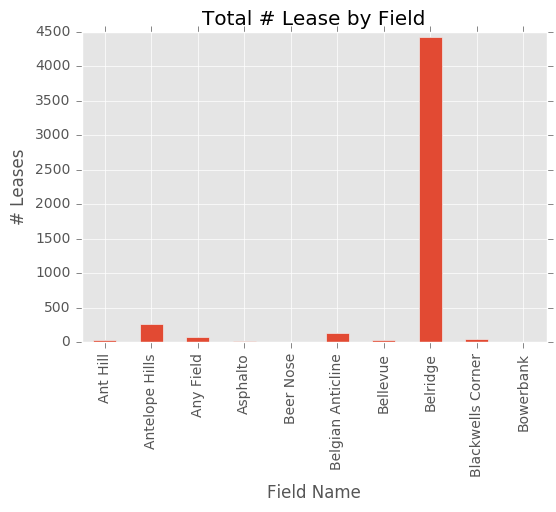

In [86]:
#Visualization 1: Looking to see how many leases are on each field. Determines how many royalty owners there are

import matplotlib.pyplot as plt
%matplotlib inline


Lease_Group = Wells_DF.groupby(['Field Name'])['Lease Name'].count().head(10)
my_plot = Lease_Group.plot(kind='bar')
my_plot = Lease_Group.plot(kind='bar',legend=None,title="Total # Lease by Field")
my_plot.set_xlabel("Field Name")
my_plot.set_ylabel("# Leases")


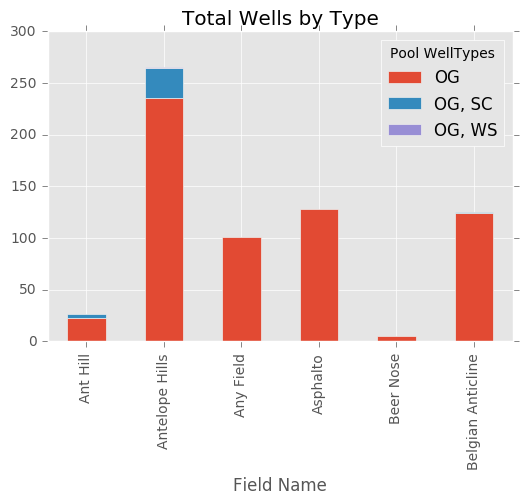

In [85]:
#Visualization 2: Looking to see how many types of wells each field has. This shows the split between producers and injectors. You can see there are mostly producers = OG

category_group=Wells_DF.groupby(['Field Name','Pool WellTypes'])['Well #'].count().head(10)
my_plot = category_group.unstack().plot(kind='bar',stacked=True,title="Total Wells by Type")


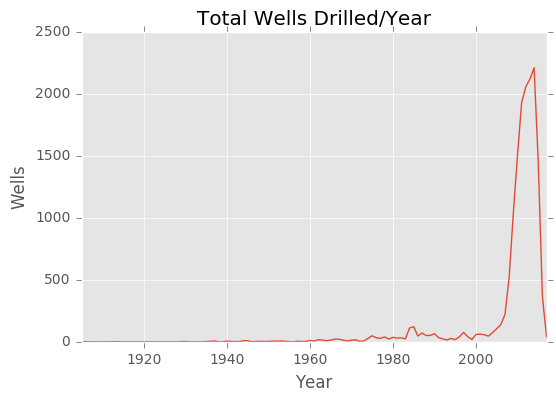

In [138]:
#Visualization 3: Looking to see how many wells have been drilled/year. After 2000 there seemed to be a spike in CA, but it drops heavily after 2015 in conjunction with the oil price drop

import datetime
pd.to_datetime(Wells_DF['SPUD Date'])
Wells_DF['Year'] = Wells_DF['SPUD Date'].dt.year
Wells_DF['Year'].dropna()

year_group = Wells_DF[['Operator Name', 'Well #', 'Year']] 
year_group =year_group.groupby(['Year'])['Well #'].count().head(100)
plt.figure()
year_group.plot(title = 'Total Wells Drilled/Year')
plt.xlabel('Year')
plt.ylabel('Wells')


